# Plotting Functions in pandas

As you’ve seen, matplotlib is actually a fairly low-level tool. You assemble a plot from
its base components: the data display (the type of plot: line, bar, box, scatter, contour,
etc.), legend, title, tick labels, and other annotations. Part of the reason for this is that
in many cases the data needed to make a complete plot is spread across many objects.
In pandas we have row labels, column labels, and possibly grouping information. This
means that many kinds of fully-formed plots that would ordinarily require a lot of
matplotlib code can be expressed in one or two concise statements. Therefore, pandas
has an increasing number of high-level plotting methods for creating standard visualizations
that take advantage of how data is organized in DataFrame objects.

NOTE
As of this writing, the plotting functionality in pandas is undergoing
quite a bit of work. As part of the 2012 Google Summer of Code program,
a student is working full time to add features and to make the
interface more consistent and usable. Thus, it’s possible that this code
may fall out-of-date faster than the other things in this book. The online
pandas documentation will be the best resource in that event.

In [2]:
from pandas import DataFrame, Series
import pandas as pd
import sys
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Line Plots

Series and DataFrame each have a plot method for making many different plot types.
By default, they make line plots (see Figure 8-13):

In [3]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

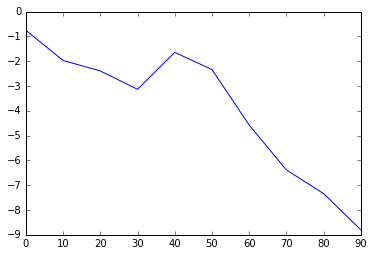

In [4]:
s.plot()

The Series object’s index is passed to matplotlib for plotting on the X axis, though this
can be disabled by passing use_index=False. The X axis ticks and limits can be adjusted
using the xticks and xlim options, and Y axis respectively using yticks and ylim. See Table 8-3 for a full listing of plot options. I’ll comment on a few more of them throughout
this section and leave the rest to you to explore.
Most of pandas’s plotting methods accept an optional ax parameter, which can be a
matplotlib subplot object. This gives you more flexible placement of subplots in a grid
layout. There will be more on this in the later section on the matplotlib API.
DataFrame’s plot method plots each of its columns as a different line on the same
subplot, creating a legend automatically (see Figure 8-14):

In [5]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))

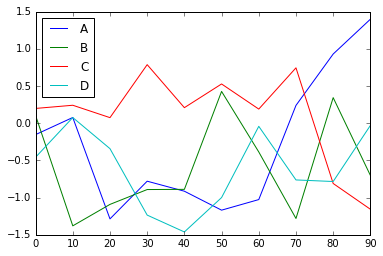

In [6]:
df.plot()

Additional keyword arguments to plot are passed through to the respective
matplotlib plotting function, so you can further customize
these plots by learning more about the matplotlib API.

Table 8-3. Series.plot method arguments

Argument Description

label Label for plot legend

ax matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot

style Style string, like 'ko--', to be passed to matplotlib.

alpha The plot fill opacity (from 0 to 1)

kind Can be 'line', 'bar', 'barh', 'kde'

logy Use logarithmic scaling on the Y axis

use_index Use the object index for tick labels

rot Rotation of tick labels (0 through 360)

xticks Values to use for X axis ticks

yticks Values to use for Y axis ticks

xlim X axis limits (e.g. [0, 10])

ylim Y axis limits

grid Display axis grid (on by default)

DataFrame has a number of options allowing some flexibility with how the columns
are handled; for example, whether to plot them all on the same subplot or to create
separate subplots. See Table 8-4 for more on these.

Argument Description

subplots Plot each DataFrame column in a separate subplot

sharex If subplots=True, share the same X axis, linking ticks and limits

sharey If subplots=True, share the same Y axis

figsize Size of figure to create as tuple

title Plot title as string

legend Add a subplot legend (True by default)

sort_columns Plot columns in alphabetical order; by default uses existing column order

## Bar Plots

Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical
bars) or kind='barh' (for horizontal bars). In this case, the Series or DataFrame index
will be used as the X (bar) or Y (barh) ticks (see Figure 8-15):

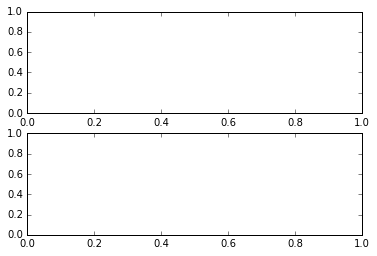

In [13]:
fig, axes = plt.subplots(2, 1)

In [9]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [11]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)

In [12]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

NOTE

For more on the plt.subplots function and matplotlib axes and figures,
see the later section in this chapter.

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value. See Figure 8-16:

In [14]:
df = DataFrame(np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [15]:
df

Genus,A,B,C,D
one,0.170427,0.296264,0.207775,0.443776
two,0.419164,0.166513,0.041052,0.395376
three,0.380560,0.442893,0.840932,0.747491
four,0.994866,0.076061,0.167673,0.627070
five,0.941000,0.987476,0.998750,0.143015
six,0.038086,0.553578,0.802401,0.454425


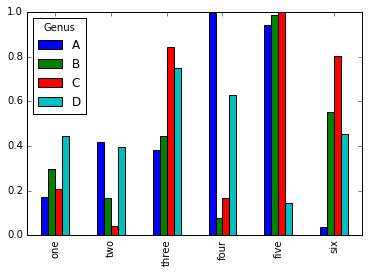

In [16]:
df.plot(kind='bar')

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.
Stacked bar plots are created from a DataFrame by passing stacked=True, resulting in
the value in each row being stacked together (see Figure 8-17):

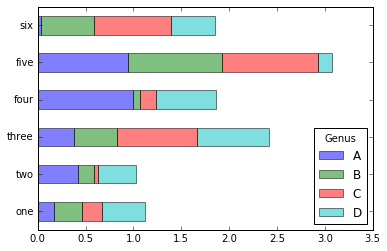

In [17]:
df.plot(kind='barh', stacked=True, alpha=0.5)

NOTE 

A useful recipe for bar plots (as seen in an earlier chapter) is to visualize
a Series’s value frequency using value_counts: s.value_counts
().plot(kind='bar')

Returning to the tipping data set used earlier in the book, suppose we wanted to make
a stacked bar plot showing the percentage of data points for each party size on each
day. I load the data using read_csv and make a cross-tabulation by day and party size:

In [18]:
tips = pd.read_csv('tips.csv')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
party_counts = pd.crosstab(tips.day, tips.size)

In [44]:
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


In [47]:
# Not many 1- and 6-person parties
party_counts = tips.ix[:, 2:5]

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [49]:
party_counts.head()

,sex,smoker,day
0,Female,No,Sun
1,Male,No,Sun
2,Male,No,Sun
3,Male,No,Sun
4,Female,No,Sun


Then, normalize so that each row sums to 1 (I have to cast to float to avoid integer
division issues on Python 2.7) and make the plot (see Figure 8-18):

In [50]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

ValueError: could not convert string to float: 'FemaleNoThur'

In [29]:
party_pcts

col_0
day
Fri
Sat
Sun
Thur


In [51]:
party_pcts.plot(kind='bar', stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot

## Histograms and Density Plots

A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a
discretized display of value frequency. The data points are split into discrete, evenly
spaced bins, and the number of data points in each bin is plotted. Using the tipping
data from before, we can make a histogram of tip percentages of the total bill using the
hist method on the Series (see Figure 8-19):

In [52]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

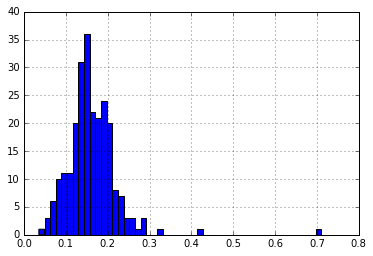

In [53]:
tips['tip_pct'].hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. A
usual procedure is to approximate this distribution as a mixture of kernels, that is,
simpler distributions like the normal (Gaussian) distribution. Thus, density plots are
also known as KDE (kernel density estimate) plots. Using plot with kind='kde' makes
a density plot using the standard mixture-of-normals KDE (see Figure 8-20):

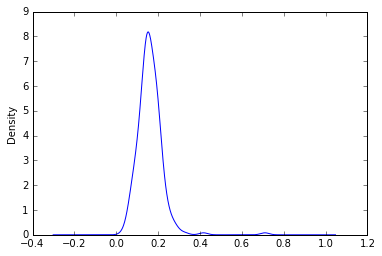

In [54]:
tips['tip_pct'].plot(kind='kde')

These two plot types are often plotted together; the histogram in normalized form (to
give a binned density) with a kernel density estimate plotted on top. As an example,
consider a bimodal distribution consisting of draws from two different standard normal
distributions (see Figure 8-21):

In [55]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)

In [56]:
comp2 = np.random.normal(10, 2, size=200) # N(10, 2)

In [57]:
values = Series(np.concatenate([comp1, comp2]))

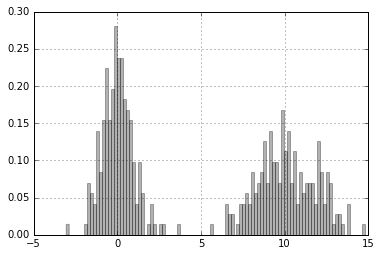

In [59]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

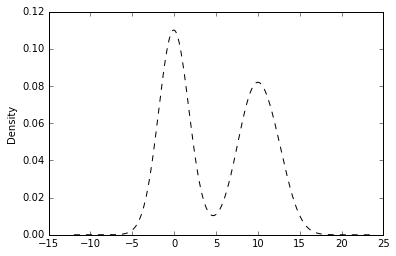

In [60]:
values.plot(kind='kde', style='k--')

## Scatter Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional
data series. matplotlib has a scatter plotting method that is the workhorse of making these kinds of plots. To give an example, I load the macrodata dataset from the
statsmodels project, select a few variables, then compute log differences:

In [61]:
macro = pd.read_csv('macrodata.csv')

In [62]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [63]:
trans_data = np.log(data).diff().dropna()

In [64]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


In [65]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


It’s easy to plot a simple scatter plot using plt.scatter (see Figure 8-22):

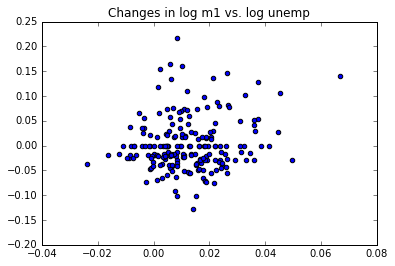

In [69]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so pandas has a scatter_matrix function for creating
one from a DataFrame. It also supports placing histograms or density plots of each
variable along the diagonal. See Figure 8-23 for the resulting plot:

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1124fc128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112ef6400>]], dtype=object)

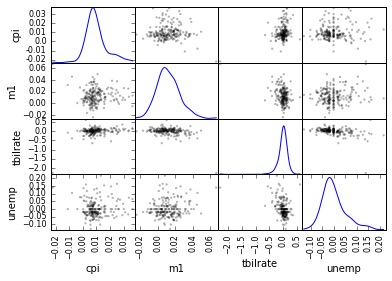

In [72]:
# import the scatter_matrix functionality
from pandas.tools.plotting import scatter_matrix

scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)